# **MOVIE_DATA_ANALYSIS🎥🎬🎞️🍿**

## **과제 1️⃣**
### 장르별 영화 트렌드 및 흥행 성공 요인 분석

#### 최근 20년간 영화 장르별 트렌드 변화를 분석하고, 각 장르에서 흥행에 성공한 영화들의 공통 요소(예산, 런타임, 출연진, 개봉 시기 등)를 파악하세요.

### 장르별 영화 수

In [11]:
import pandas as pd
from IPython.display import display
import warnings
import ast

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore', category=UserWarning)

# 파일 경로
file_path = './data/processed/kobis_genre_exploded.csv'

# 데이터 로드
df = pd.read_csv(file_path)

print(f"전체 데이터 수: {len(df)}개")
print(f"장르 수: {df['genres'].nunique()}개")

# 장르별 영화 수 계산하여 DataFrame 생성
genre_counts = df['genres'].value_counts()
total_count = len(df)

genre_df = pd.DataFrame({
    '장르': genre_counts.index,
    '영화편수': genre_counts.values,
    '비율(%)': (genre_counts.values / total_count * 100).round(2)
})

# 인덱스를 1부터 시작하도록 설정
genre_df.index = range(1, len(genre_df) + 1)

print(f"\n📊 장르별 영화 수 (영화 편수 많은 순):")
display(genre_df)

전체 데이터 수: 1554개
장르 수: 20개

📊 장르별 영화 수 (영화 편수 많은 순):


,장르,영화편수,비율(%)
1,드라마,434,27.93
2,코미디,259,16.67
3,액션,167,10.75
4,멜로/로맨스,159,10.23
5,스릴러,126,8.11
6,범죄,100,6.44
7,공포(호러),53,3.41
8,미스터리,48,3.09
9,사극,44,2.83
10,애니메이션,43,2.77


### 장르별 흥행 영화 TOP 5 (수익 기준) 

In [14]:
import pandas as pd
from IPython.display import display
import warnings
import ast

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore', category=UserWarning)

# 파일 경로
file_path = './data/processed/kobis_genre_exploded.csv'

# 데이터 로드
df = pd.read_csv(file_path)

print(f"전체 데이터 수: {len(df)}개")
print(f"장르 수: {df['genres'].nunique()}개")

# 필요한 컬럼만 선택
columns_needed = ['title', 'revenue', 'audience_total', 'runtime', 
                 'director_name_ko', 'cast_names_ko', 'release_date', 'genres']
df_selected = df[columns_needed].copy()

# 컬럼명 변경
df_selected.rename(columns={'director_name_ko': 'director'}, inplace=True)

# 결측치 처리
df_selected = df_selected.dropna(subset=['title', 'revenue', 'genres'])

# 각 장르별 상위 5개 영화 추출
def get_top5_by_genre(df, genre):
    """특정 장르의 revenue 기준 상위 5개 영화 반환"""
    genre_df = df[df['genres'] == genre].copy()
    return genre_df.nlargest(5, 'revenue')

# 모든 장르 리스트 가져오기
all_genres = df_selected['genres'].unique()

# 장르별 상위 5개 영화를 모은 DataFrame 생성
top5_by_genre = []

for genre in sorted(all_genres):
    top5 = get_top5_by_genre(df_selected, genre)
    top5 = top5.copy()
    top5['genre'] = genre
    top5['rank'] = range(1, len(top5) + 1)
    top5_by_genre.append(top5)

# 모든 결과 합치기
result_df = pd.concat(top5_by_genre, ignore_index=True)

# 컬럼 순서 정리
final_columns = ['genre', 'rank', 'title', 'revenue', 'audience_total', 
                'runtime', 'director', 'cast_names_ko', 'release_date']
result_df = result_df[final_columns]

print(f"\n=== 장르별 흥행 상위 5개 영화 결과 ===")
print(f"총 {len(result_df)}개 결과")

# 장르별로 개별 DataFrame display
for genre in sorted(all_genres):
    genre_top5 = result_df[result_df['genre'] == genre]
    if len(genre_top5) > 0:
        print(f"\n🎬 {genre} 장르 TOP 5:")
        display_df = genre_top5.drop(['genre'], axis=1).reset_index(drop=True)
        display(display_df)

전체 데이터 수: 1554개
장르 수: 20개

=== 장르별 흥행 상위 5개 영화 결과 ===
총 88개 결과

🎬 SF 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,설국열차,6.681845e+10,9321959.0,125.0,봉준호,크리스 에반스|송강호|에드 해리스|존 허트|틸다 스윈튼|제이미 벨|옥타비아 스펜서|...,2013-08-01
1,2,괴물,6.656903e+10,10892305.0,119.0,봉준호,송강호|변희봉|박해일|배두나|고아성|오달수|박노식|고수희|윤제문|김뢰하,2006-07-27
2,3,연가시,3.206548e+10,4499856.0,109.0,박정우,김명민|문정희|김동완|이하늬|강신일|송영창|조덕현|최정우|전국환|정인기,2012-07-05
3,4,7광구,1.926371e+10,2225436.0,101.0,김지훈,하지원|박철민|이한위|오지호|송새벽|안성기|차예련|박정학|박영수|오민석,2011-08-04
4,5,초능력자,1.524963e+10,2111567.0,114.0,김민석,강동원|고수|김수남|정은채|손지나|최덕문|변희봉|김광규|김인권|김한나,2010-11-10



🎬 가족 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,괴물,6.656903e+10,10892305.0,119.0,봉준호,송강호|변희봉|박해일|배두나|고아성|오달수|박노식|고수희|윤제문|김뢰하,2006-07-27
1,2,맨발의 기봉이,1.214021e+10,1988117.0,100.0,권수경,신현준|임하룡|탁재훈|김수미|김효진|정구영|강낙호|조덕현|지대한|권병길,2006-04-26
2,3,깡철이,8.501042e+09,1197467.0,108.0,안권태,유아인|김해숙|정유미|김정태|김성오|이시언|신정근|김인우|장태성|이도겸,2013-10-02
3,4,뽀로로 극장판 보물섬 대모험,5.783709e+09,752466.0,79.0,김현호,이선|이미자|김현지|홍소영|정미숙|김서영|김환진|남도형|정승욱|이장원,2019-04-25
4,5,마이 파더,5.330582e+09,834630.0,105.0,황동혁,김영철|다니엘 헤니|김인권|이건문|안석환|김호연|전국환|최종률|이상희|최정원,2007-09-06



🎬 공연 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,러브 유어셀프 인 서울,3.209683e+09,342366.0,111.0,NaN,김남준|김석진|민윤기|정호석|박지민|김태형|전정국,2019-01-26



🎬 공포(호러) 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,연가시,3.206548e+10,4499856.0,109.0,박정우,김명민|문정희|김동완|이하늬|강신일|송영창|조덕현|최정우|전국환|정인기,2012-07-05
1,2,오싹한 연애,2.159157e+10,2952858.0,114.0,황인호,손예진|이민기|신동훈|조아라|이현진|이미도|황승언|김현숙|김혜숙|박재우,2011-12-01
2,3,곤지암,2.133222e+10,2662377.0,94.0,정범식,위하준|박지현|오아연|문예원|이승욱|류제윤|박성훈|이주원|정아노마,2018-03-28
3,4,변신,1.537602e+10,1797796.0,112.0,김홍선,배성우|성동일|장영남|김혜준|조이현|김강훈|이장원|김귀선|김세희|백윤식,2019-08-21
4,5,박쥐,1.479721e+10,2199378.0,133.0,박찬욱,송강호|김옥빈|신하균|김해숙|송영창|오달수|박인환|구용완|라미란|손종학,2009-04-30



🎬 기타 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,더 테러 라이브,3.984740e+10,5580701.0,97.0,김병우,하정우|이경영|전혜진|이다윗|김홍파|김대명|최진호|김소진|강진아|강신철,2013-07-31
1,2,번 더 스테이지: 더 무비,2.533015e+09,298402.0,82.0,박준수,김남준|김석진|민윤기|정호석|박지민|김태형|전정국|방시혁|윤석준,2018-11-15
2,3,브링 더 소울 : 더 무비,2.368846e+09,274064.0,101.0,박준수,김남준|김석진|민윤기|정호석|박지민|김태형|전정국,2019-08-07



🎬 다큐멘터리 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,"님아, 그 강을 건너지 마오",3.697134e+10,4746458.0,85.0,진모영,조병만|강계열,2014-11-27
1,2,워낭소리,1.865210e+10,2845331.0,77.0,이충렬,최원균|이삼순|김민자|최종만|최종민,2009-01-15
2,3,노무현입니다,1.447037e+10,1842323.0,109.0,이창재,노무현|이상호,2017-05-25
3,4,"그날, 바다",4.404932e+09,534665.0,110.0,김지영,정우성|김지영|이주용|장동원|박종대|김도연|김도영|김어준,2018-04-12
4,5,"울지마, 톤즈",2.108957e+09,367683.0,91.0,구수환,이금희,2010-09-09



🎬 드라마 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,신과함께-죄와 벌,1.156022e+11,14398110.0,139.0,김용화,하정우|차태현|주지훈|김향기|김동욱|오달수|임원희|도경수|이준혁|예수정,2017-12-20
1,2,국제시장,1.105035e+11,14198690.0,126.0,윤제균,황정민|김윤진|오달수|정진영|장영남|라미란|김슬기|정영기|맹세창|박재우,2014-12-17
2,3,베테랑,1.050585e+11,13397762.0,123.0,류승완,황정민|유아인|유해진|오달수|장윤주|김시후|오대환|정웅인|정만식|송영창,2015-08-05
3,4,신과함께-인과 연,1.025880e+11,12264813.0,141.0,김용화,하정우|주지훈|김향기|마동석|김동욱|도경수|이준혁|정지훈|김동욱|조한철,2018-08-01
4,5,암살,9.826859e+10,12679383.0,139.0,최동훈,전지현|이정재|하정우|오달수|조진웅|이경영|최덕문|김의성|박병은|김홍파,2015-07-22



🎬 멜로/로맨스 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,늑대소년,4.640984e+10,6627275.0,124.0,조성희,송중기|박보영|장영남|유연석|김향기|장서이|이영란|유승목|서동수|남정희,2012-10-31
1,2,미녀는 괴로워,3.590547e+10,6018121.0,120.0,김용화,김아중|주진모|김현숙|조아영|이보라|박노식|이한위|이원종|류승수|김지석,2006-12-14
2,3,내 아내의 모든 것,3.409404e+10,4578886.0,121.0,민규동,임수정|이선균|류승룡|박희본|김지영|남명렬|김도영|이달형|이진희|김도균,2012-05-17
3,4,건축학개론,3.001534e+10,4082092.0,118.0,이용주,엄태웅|한가인|이제훈|배수지|고준희|조정석|신예진|유연석|조현철|김의성,2012-03-22
4,5,가장 보통의 연애,2.484811e+10,2918536.0,109.0,김한결,김래원|공효진|강기영|정웅인|장소연|이채은|정혜린|손우현|박근록|주민경,2019-10-02



🎬 뮤지컬 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,가루지기,1.620189e+09,245857.0,120.0,신한솔,봉태규|김예원|박영서|김영애|오달수|윤여정|김상일|류미주|김호원|서영,2008-04-30
1,2,구미호 가족,7.970608e+08,128150.0,102.0,이형곤,주현|박준규|하정우|박시연|최경원|박철민|이광현|우현|김명선|조승우,2006-09-28
2,3,번개맨과 신비의 섬,2.893812e+08,36416.0,69.0,김지열,서홍석|유수호|최오식|이상철|김수미|김수미,2018-04-05



🎬 미스터리 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,곡성,5.564942e+10,6853336.0,156.0,나홍진,곽도원|황정민|쿠니무라 준|천우희|김환희|허진|장소연|김도윤|손강국|전배수,2016-05-12
1,2,검은 사제들,4.237448e+10,5437772.0,108.0,장재현,김윤석|강동원|박소담|김병옥|김의성|이호재|남일우|손종학|조수향|민진웅,2015-11-05
2,3,마녀,2.723658e+10,3188405.0,125.0,박훈정,김다미|조민수|박희순|최우식|김하나|정다은|김기훈|최정우|고민시|오미희,2018-06-27
3,4,사바하,1.994203e+10,2389760.0,122.0,장재현,이정재|박정민|이재인|유지태|정진영|진선규|이다윗|황정민|지승현|이항나,2019-02-20
4,5,화차,1.832749e+10,2418592.0,117.0,변영주,이선균|김민희|조성하|송하윤|차수연|최덕문|이희준|박해준|임남숙|임순옥,2012-03-08



🎬 범죄 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,도둑들,9.364088e+10,12979237.0,135.0,최동훈,김윤석|김혜수|이정재|전지현|임달화|김해숙|오달수|김수현|이심결|증국상,2012-07-25
1,2,검사외전,7.699307e+10,9664799.0,126.0,이일형,황정민|강동원|이성민|박성웅|김응수|신소율|주진모|김원해|김홍파|김병옥,2016-02-03
2,3,마스터,5.794665e+10,7133595.0,142.0,조의석,이병헌|강동원|김우빈|엄지원|오달수|박해수|진경|김정우|우도환|배정남,2016-12-21
3,4,내부자들,5.657354e+10,7068121.0,130.0,우민호,이병헌|조승우|백윤식|이경영|김홍파|배성우|조재윤|김대명|조우진|이엘,2015-11-19
4,5,범죄도시,5.617979e+10,6861910.0,121.0,강윤성,마동석|윤계상|조재윤|최귀화|김성규|유지연|진선규|허동원|박지환|허성태,2017-10-03



🎬 사극 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,명량,1.356420e+11,17597914.0,128.0,김한민,최민식|류승룡|조진웅|김명곤|진구|이정현|권율|노민우|이승준|오타니 료헤이,2014-07-30
1,2,"광해, 왕이 된 남자",8.862082e+10,12274154.0,131.0,추창민,이병헌|류승룡|한효주|장광|김인권|심은경|김명곤|박지아|이양희|전국향,2012-09-13
2,3,관상,6.591471e+10,9121108.0,139.0,한재림,송강호|이정재|백윤식|조정석|이종석|김혜수|이도엽|김의성|김강현|김태우,2013-09-11
3,4,최종병기 활,5.578002e+10,7463056.0,122.0,김한민,박해일|류승룡|김무열|문채원|이한위|김구택|이경영|박기웅|이승준|이재구,2011-08-10
4,5,사도,4.872069e+10,6229050.0,125.0,이준익,송강호|유아인|문근영|전혜진|김해숙|박원상|진지희|박소담|서예지|김민규,2015-09-16



🎬 서부극(웨스턴) 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,"좋은 놈, 나쁜 놈, 이상한 놈",4.369137e+10,6676132.0,139.0,김지운,송강호|이병헌|정우성|엄지원|오일용|오달수|김광일|손병호|이청아|김선영,2008-07-17



🎬 스릴러 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,부산행,9.291417e+10,11531866.0,118.0,연상호,공유|정유미|마동석|김수안|최우식|안소희|김의성|예수정|박명신|허성우,2016-07-20
1,2,곡성,5.564942e+10,6853336.0,156.0,나홍진,곽도원|황정민|쿠니무라 준|천우희|김환희|허진|장소연|김도윤|손강국|전배수,2016-05-12
2,3,숨바꼭질,3.944184e+10,5581942.0,107.0,허정,손현주|문정희|전미선|백종우|김수안|김원해|노수산나|정준원|성유빈|정민성,2013-08-14
3,4,판도라,3.580226e+10,4545686.0,135.0,박정우,김남길|김영애|문정희|정진영|이경영|강신일|김대명|유승목|김주현|김명민,2016-12-07
4,5,아가씨,3.464238e+10,4215263.0,144.0,박찬욱,김민희|김태리|하정우|조진웅|김해숙|문소리|김인우|이용녀|최병모|조은형,2016-06-01



🎬 애니메이션 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,마당을 나온 암탉,1.343974e+10,2021416.0,93.0,오성윤,문소리|박철민|최민식|유승호|김상현|김한솔|홍윤정,2011-07-28
1,2,점박이:한반도의 공룡3D,8.978200e+09,967168.0,88.0,한상호,이형석|신용우|구자형,2012-01-26
2,3,신비아파트 극장판 하늘도깨비 대 요르문간드,6.843272e+09,867161.0,96.0,변영규,김영은|김채하|신용우|양정화|김현지|양정화|조현정|강성우|김다올|김다올,2019-12-19
3,4,극장판 헬로카봇 : 백악기 시대,6.406152e+09,854230.0,84.0,김진철,이지현|김용준|양정화|홍범기|엄상현|사문영|위훈|민응식|신용우|안소이,2018-08-01
4,5,뽀로로 극장판 슈퍼썰매 대모험,6.368320e+09,867148.0,77.0,박영균,이선|이미자|김환진|함수정|홍소영|조현정|정미숙|강승훈|김남희|김은정,2013-01-23



🎬 액션 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,명량,1.356420e+11,17597914.0,128.0,김한민,최민식|류승룡|조진웅|김명곤|진구|이정현|권율|노민우|이승준|오타니 료헤이,2014-07-30
1,2,베테랑,1.050585e+11,13397762.0,123.0,류승완,황정민|유아인|유해진|오달수|장윤주|김시후|오대환|정웅인|정만식|송영창,2015-08-05
2,3,암살,9.826859e+10,12679383.0,139.0,최동훈,전지현|이정재|하정우|오달수|조진웅|이경영|최덕문|김의성|박병은|김홍파,2015-07-22
3,4,도둑들,9.364088e+10,12979237.0,135.0,최동훈,김윤석|김혜수|이정재|전지현|임달화|김해숙|오달수|김수현|이심결|증국상,2012-07-25
4,5,부산행,9.291417e+10,11531866.0,118.0,연상호,공유|정유미|마동석|김수안|최우식|안소희|김의성|예수정|박명신|허성우,2016-07-20



🎬 어드벤처 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,해운대,8.069220e+10,11276049.0,129.0,윤제균,설경구|하지원|박중훈|엄정화|이민기|강대규|김원영|김유빈|신정원|성유경,2009-07-22
1,2,백두산,6.974740e+10,8242478.0,128.0,김병서,이병헌|하정우|마동석|전혜진|배수지|이상원|옥자연|한수현|강신철|이경영,2019-12-19
2,3,해적: 바다로 간 산적,6.618997e+10,8625574.0,129.0,이석훈,김남길|손예진|신정근|유해진|이경영|오달수|김태우|박철민|김원해|조달환,2014-08-06
3,4,"좋은 놈, 나쁜 놈, 이상한 놈",4.369137e+10,6676132.0,139.0,김지운,송강호|이병헌|정우성|엄지원|오일용|오달수|김광일|손병호|이청아|김선영,2008-07-17
4,5,조선명탐정 : 사라진 놉의 딸,3.017267e+10,3832898.0,124.0,김석윤,김명민|오달수|이연희|조관우|정원중|최무성|우현|황정민|김원해|박수영,2015-02-11



🎬 전쟁 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,인천상륙작전,5.499344e+10,7033357.0,110.0,이재한,이정재|이범수|리암 니슨|진세연|정준호|박철민|김병옥|이창세|박정원|션 리차드,2016-07-27
1,2,웰컴 투 동막골,4.018094e+10,6413223.0,133.0,박광현,신하균|정재영|강혜정|리민|류덕환|임하룡|강남석|손재영|이다운|서재경,2005-08-04
2,3,신기전,2.422619e+10,3710813.0,134.0,김유진,정재영|한은정|허준호|안성기|김명수|신정근|조원희|이광희|박윤희|조주현,2008-09-04
3,4,포화속으로,2.369803e+10,3307797.0,120.0,이재한,차승원|권상우|최승현|김승우|문재원|김혜성|신현탁|신경선|추종범|김윤성,2010-06-16
4,5,고지전,2.182584e+10,2925790.0,133.0,장훈,신하균|고수|이제훈|류승수|고창석|이다윗|류승룡|김옥빈|조진웅|정인기,2011-07-20



🎬 코미디 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,극한직업,1.394945e+11,16243231.0,111.0,이병헌,류승룡|이하늬|진선규|이동휘|공명|양현민|장진희|오정세|이중옥|송영규,2019-01-23
1,2,7번방의 선물,9.129120e+10,12786081.0,127.0,이환경,류승룡|박신혜|갈소원|오달수|박원상|김정태|정만식|김기천|조덕현|조재윤,2013-01-23
2,3,엑시트,7.910731e+10,9407840.0,103.0,이상근,조정석|임윤아|설도희|최재영|고두심|김환영|변건우|황지현|황효은|고두심,2019-07-31
3,4,검사외전,7.699307e+10,9664799.0,126.0,이일형,황정민|강동원|이성민|박성웅|김응수|신소율|주진모|김원해|김홍파|김병옥,2016-02-03
4,5,국가대표,5.735129e+10,8002297.0,137.0,김용화,하정우|성동일|김지석|김동욱|최재환|이재응|이은성|심영|이한위|이혜숙,2009-07-29



🎬 판타지 장르 TOP 5:


,rank,title,revenue,audience_total,runtime,director,cast_names_ko,release_date
0,1,신과함께-죄와 벌,1.156022e+11,14398110.0,139.0,김용화,하정우|차태현|주지훈|김향기|김동욱|오달수|임원희|도경수|이준혁|예수정,2017-12-20
1,2,신과함께-인과 연,1.025880e+11,12264813.0,141.0,김용화,하정우|주지훈|김향기|마동석|김동욱|도경수|이준혁|정지훈|김동욱|조한철,2018-08-01
2,3,디워,4.933355e+10,7854274.0,90.0,심형래,브룩스 아만다|베어 제이슨,2007-08-01
3,4,늑대소년,4.640984e+10,6627275.0,124.0,조성희,송중기|박보영|장영남|유연석|김향기|장서이|이영란|유승목|서동수|남정희,2012-10-31
4,5,전우치,4.378833e+10,6022722.0,136.0,최동훈,강동원|임수정|김윤석|유해진|김시권|주진모|선우선|강동균|정혜란|손선영,2009-12-23


### **영화 장르별 트렌드 변화 분석 및 시각화**

### 영화 장르 비율
- 10개 미만 장르는 기타로 통일

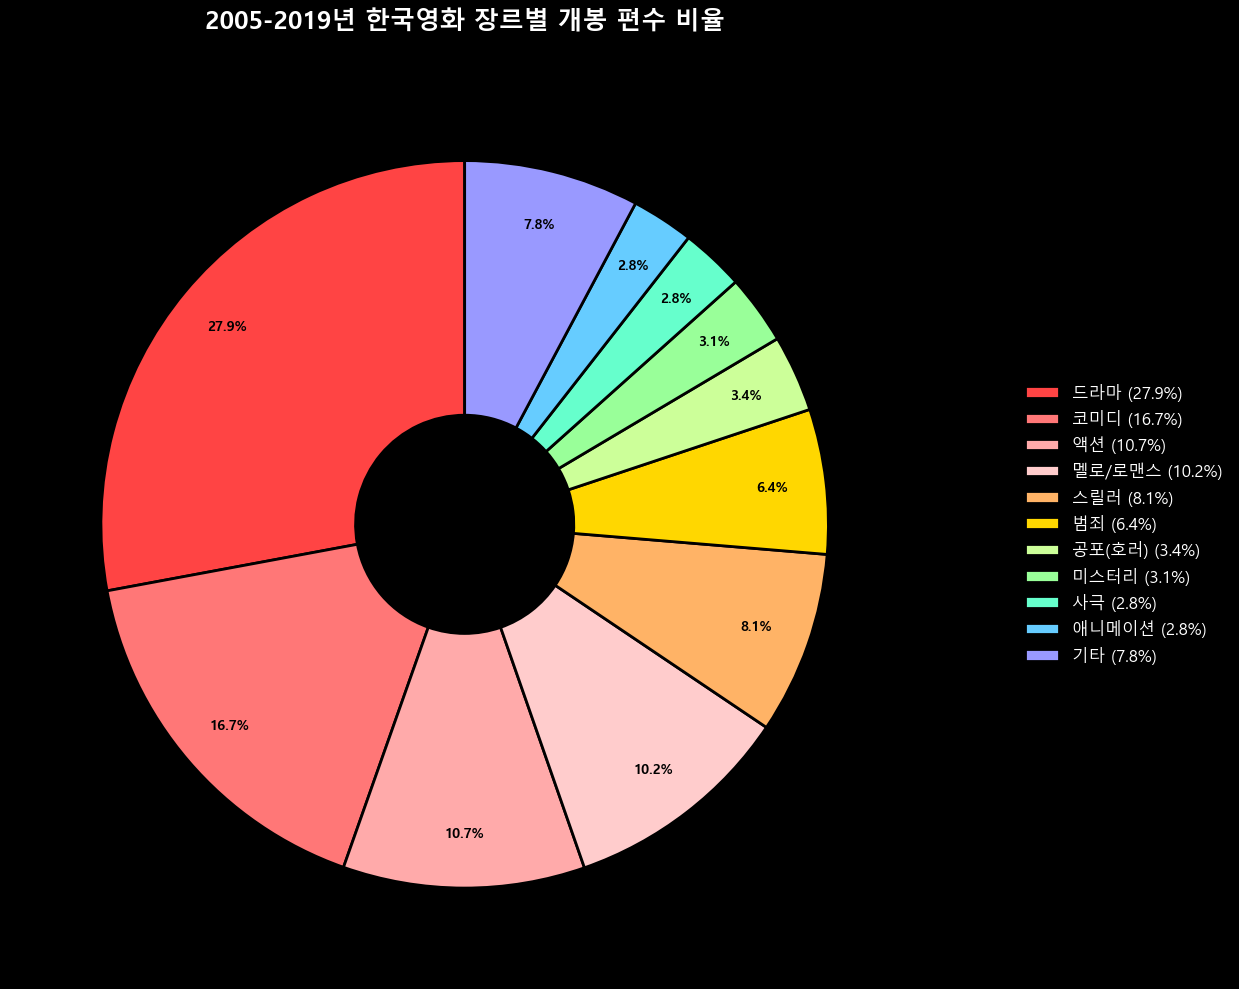

총 영화 수: 1,554편
장르 수: 20개

'기타'에 포함된 장르들 (10개):
- 가족: 25편 (1.6%)
- 판타지: 25편 (1.6%)
- 어드벤처: 20편 (1.3%)
- 다큐멘터리: 17편 (1.1%)
- 전쟁: 16편 (1.0%)
- SF: 10편 (0.6%)
- 뮤지컬: 3편 (0.2%)
- 기타: 3편 (0.2%)
- 서부극(웨스턴): 1편 (0.1%)
- 공연: 1편 (0.1%)

상위 5개 장르:
1. 드라마: 434편 (27.9%)
2. 코미디: 259편 (16.7%)
3. 액션: 167편 (10.7%)
4. 멜로/로맨스: 159편 (10.2%)
5. 스릴러: 126편 (8.1%)


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import ast

# 경고 메시지 무시 설정 및 폰트 설정
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 파일 경로
PATH_EXP = "./data/processed/kobis_genre_exploded.csv"

# 데이터 로드
df = pd.read_csv(PATH_EXP)

# 장르별 개봉 편수 계산
genre_counts = df['genres'].value_counts()

# 파이 차트 생성
plt.figure(figsize=(14, 10))
plt.style.use('dark_background')

# 2% 미만 장르는 기타로 분류
threshold = 0.02
total_movies = len(df)
other_genres = genre_counts[genre_counts / total_movies < threshold]
main_genres = genre_counts[genre_counts / total_movies >= threshold]

# 기타 장르 정보 저장
other_genre_list = other_genres.index.tolist() if len(other_genres) > 0 else []

# 메인 장르들만 먼저 내림차순 정렬
main_genres_sorted = main_genres.sort_values(ascending=False)

# 기타가 있으면 맨 마지막에 추가
if len(other_genres) > 0:
    other_sum = other_genres.sum()
    final_data = main_genres_sorted.copy()
    final_data = pd.concat([final_data, pd.Series([other_sum], index=['기타'])])
else:
    final_data = main_genres_sorted

# 색상 설정 (이미지와 유사한 따뜻한 톤)
colors = ['#FF4444', '#FF7777', '#FFAAAA', '#FFCCCC', '#FFB366', 
          '#FFD700', '#CCFF99', '#99FF99', '#66FFCC', '#66CCFF', 
          '#9999FF', '#CC99FF', '#FF99CC', '#FFFF99']

# 파이 차트 그리기 (도넛 형태)
wedges, texts, autotexts = plt.pie(final_data.values, 
                                  labels=None,  # 라벨 제거
                                  autopct='%1.1f%%',
                                  colors=colors[:len(final_data)],
                                  startangle=90,
                                  pctdistance=0.85,
                                  textprops={'fontsize': 10, 'color': 'black', 'weight': 'bold'},
                                  wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 2})

# 가운데 검은 원 추가 (도넛 효과)
centre_circle = plt.Circle((0,0), 0.30, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 제목 설정
plt.title('2005-2019년 한국영화 장르별 개봉 편수 비율', 
          fontsize=18, fontweight='bold', pad=30, color='white')

# 범례 추가 (우측에 배치, 큰 것부터)
legend_labels = [f'{genre} ({(count/total_movies*100):.1f}%)' 
                for genre, count in final_data.items()]
plt.legend(wedges, legend_labels,
          loc="center left",
          bbox_to_anchor=(1.1, 0.5),
          fontsize=12,
          frameon=False)

# 차트 표시
plt.tight_layout()
plt.show()

# 기타 장르 정보 및 통계 출력
print(f"총 영화 수: {total_movies:,}편")
print(f"장르 수: {len(genre_counts)}개")

if other_genre_list:
    print(f"\n'기타'에 포함된 장르들 ({len(other_genre_list)}개):")
    for genre in other_genre_list:
        count = genre_counts[genre]
        percentage = count / total_movies * 100
        print(f"- {genre}: {count}편 ({percentage:.1f}%)")

print(f"\n상위 5개 장르:")
for i, (genre, count) in enumerate(final_data.head(5).items(), 1):
    percentage = count / total_movies * 100
    print(f"{i}. {genre}: {count}편 ({percentage:.1f}%)")

### 수익 기준 TOP10 장르별 분석 (평균 수익, 평균 관객수, 평균 런타임)
- 영화 편수 10개 미만 장르 / 기타 장르는 제외

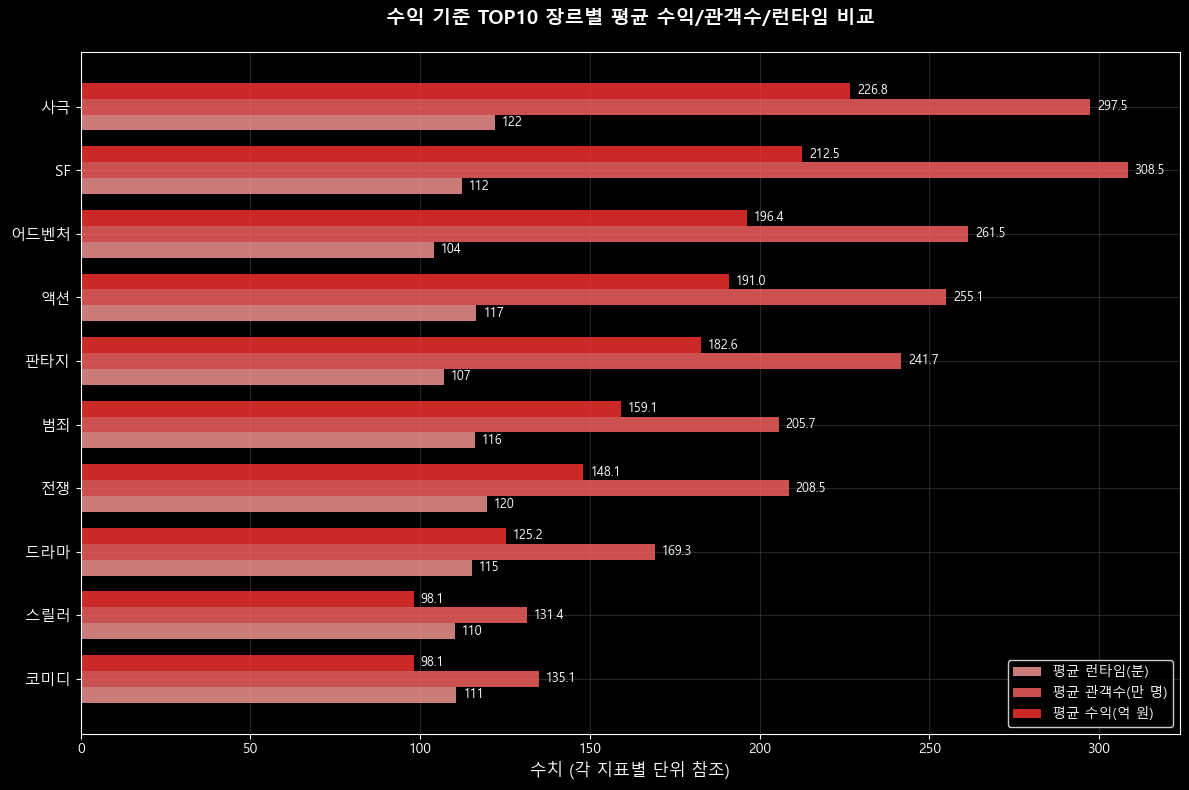

수익 기준 TOP10 장르 통계:
사극
  평균 수익: 226.8억원
  평균 관객: 297.5만명
  평균 런타임: 122분

SF
  평균 수익: 212.5억원
  평균 관객: 308.5만명
  평균 런타임: 112분

어드벤처
  평균 수익: 196.4억원
  평균 관객: 261.5만명
  평균 런타임: 104분

액션
  평균 수익: 191.0억원
  평균 관객: 255.1만명
  평균 런타임: 117분

판타지
  평균 수익: 182.6억원
  평균 관객: 241.7만명
  평균 런타임: 107분

범죄
  평균 수익: 159.1억원
  평균 관객: 205.7만명
  평균 런타임: 116분

전쟁
  평균 수익: 148.1억원
  평균 관객: 208.5만명
  평균 런타임: 120분

드라마
  평균 수익: 125.2억원
  평균 관객: 169.3만명
  평균 런타임: 115분

스릴러
  평균 수익: 98.1억원
  평균 관객: 131.4만명
  평균 런타임: 110분

코미디
  평균 수익: 98.1억원
  평균 관객: 135.1만명
  평균 런타임: 111분



In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import ast

# 경고 메시지 무시 설정 및 폰트 설정
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 파일 경로
PATH_EXP = "./data/processed/kobis_genre_exploded.csv"

# 데이터 로드
df = pd.read_csv(PATH_EXP)

# 영화 편수가 10편 이상인 장르만 필터링 (기타 제외)
genre_counts = df['genres'].value_counts()
valid_genres = genre_counts[genre_counts >= 10].index
valid_genres = valid_genres[valid_genres != '기타']  # 기타 장르 제외

df_filtered = df[df['genres'].isin(valid_genres)]

# 장르별 평균값 계산
genre_stats = df_filtered.groupby('genres').agg({
    'revenue': 'mean',
    'audience_total': 'mean', 
    'runtime': 'mean'
}).reset_index()

# 평균 수익 기준으로 상위 10개 장르 선택
top10_genres = genre_stats.nlargest(10, 'revenue')

# 수익 기준으로 정렬 (내림차순)
top10_genres = top10_genres.sort_values('revenue', ascending=True)  # 가로막대에서는 ascending=True로 해야 큰 값이 위에

# 단위 변환 (억원, 만명)
top10_genres['revenue_억'] = top10_genres['revenue'] / 100000000  # 억원
top10_genres['audience_만'] = top10_genres['audience_total'] / 10000  # 만명

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('black')  # 검정 배경
ax.set_facecolor('black')

# Y축 위치 설정
y_pos = np.arange(len(top10_genres))
bar_height = 0.25

# 막대 그래프 그리기 (순서 변경: 런타임, 관객수, 수익)
bars3 = ax.barh(y_pos - bar_height, top10_genres['runtime'], bar_height, 
                label='평균 런타임(분)', color='#FF9999', alpha=0.8)
bars2 = ax.barh(y_pos, top10_genres['audience_만'], bar_height, 
                label='평균 관객수(만 명)', color='#FF6666', alpha=0.8)  
bars1 = ax.barh(y_pos + bar_height, top10_genres['revenue_억'], bar_height, 
                label='평균 수익(억 원)', color='#FF3333', alpha=0.8)

# 막대 그래프에 숫자 표시
for i, (runtime, audience, revenue) in enumerate(zip(top10_genres['runtime'], 
                                                   top10_genres['audience_만'], 
                                                   top10_genres['revenue_억'])):
    ax.text(runtime + 2, i - bar_height, f'{runtime:.0f}', 
            va='center', ha='left', color='white', fontsize=9)
    ax.text(audience + 2, i, f'{audience:.1f}', 
            va='center', ha='left', color='white', fontsize=9)
    ax.text(revenue + 2, i + bar_height, f'{revenue:.1f}', 
            va='center', ha='left', color='white', fontsize=9)

# 축 설정
ax.set_yticks(y_pos)
ax.set_yticklabels(top10_genres['genres'], color='white', fontsize=11)
ax.set_xlabel('수치 (각 지표별 단위 참조)', color='white', fontsize=12)
ax.set_title('수익 기준 TOP10 장르별 평균 수익/관객수/런타임 비교', 
             color='white', fontsize=14, fontweight='bold', pad=20)

# 범례 설정 (순서 변경)
ax.legend(loc='lower right', frameon=True, facecolor='black', 
          edgecolor='white', labelcolor='white')

# 그리드 설정
ax.grid(True, alpha=0.3, color='gray')
ax.set_axisbelow(True)

# 축 색상 설정
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 통계 정보 출력
print("수익 기준 TOP10 장르 통계:")
print("="*50)
for _, row in top10_genres.sort_values('revenue', ascending=False).iterrows():
    print(f"{row['genres']}")
    print(f"  평균 수익: {row['revenue_억']:.1f}억원")
    print(f"  평균 관객: {row['audience_만']:.1f}만명")
    print(f"  평균 런타임: {row['runtime']:.0f}분")
    print()

### 수익 기준 TOP10 장르별 네티즌 평점 분포
- 네이버 네티즌 평점을 기준으로 함 (비평가 평점 제외)
- 영화 편수 10개 미만 장르 / 기타 장르는 제외

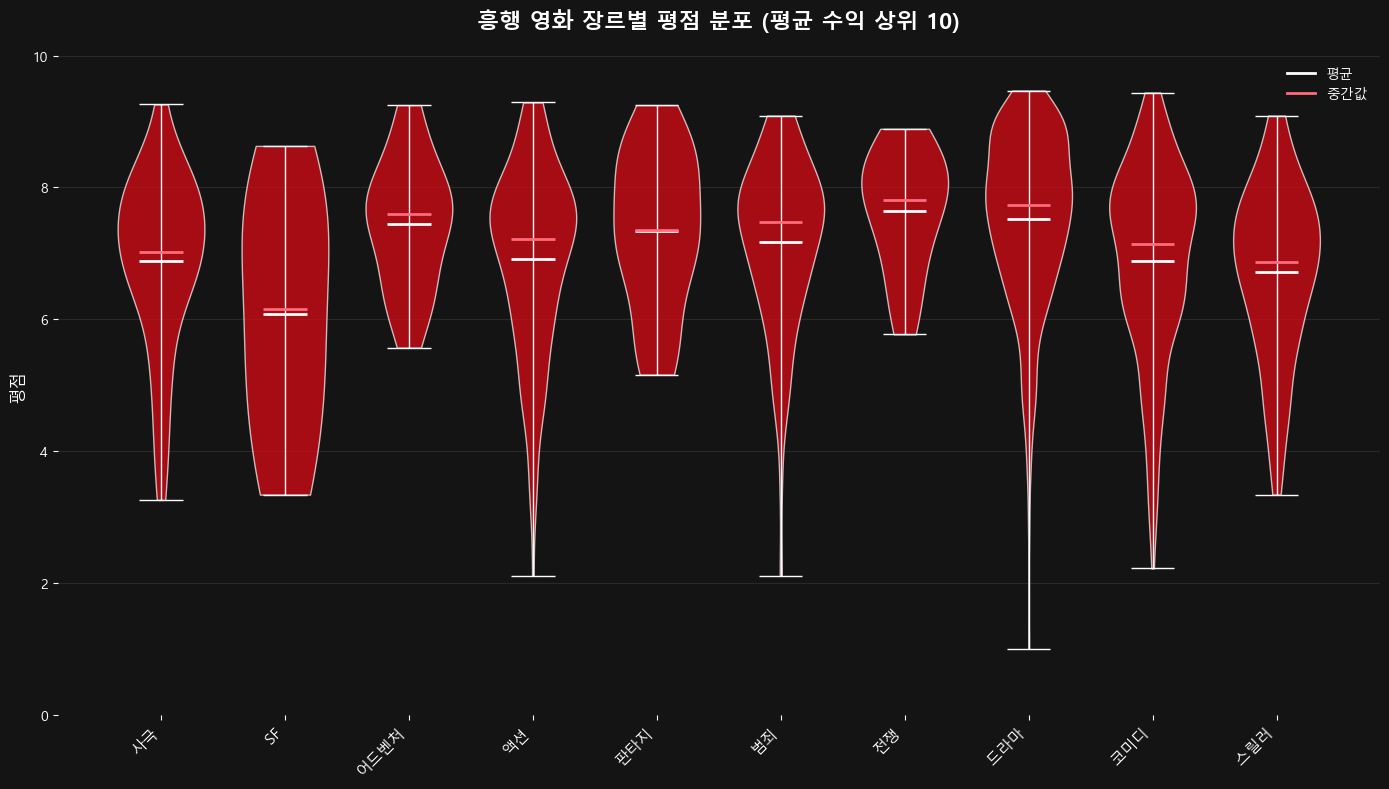

장르별 네티즌 평점 통계:


,장르,영화수,평균평점,중간값,표준편차,최고평점,최저평점
1,사극,44,6.89,7.02,1.32,9.26,3.26
2,SF,10,6.08,6.16,1.81,8.63,3.34
3,어드벤처,20,7.44,7.59,0.97,9.25,5.57
4,액션,167,6.92,7.22,1.41,9.29,2.11
5,판타지,24,7.34,7.36,1.19,9.25,5.16
6,범죄,100,7.17,7.48,1.27,9.09,2.11
7,전쟁,16,7.64,7.82,0.91,8.89,5.77
8,드라마,432,7.52,7.73,1.30,9.47,1.00
9,코미디,258,6.89,7.14,1.46,9.44,2.22
10,스릴러,126,6.71,6.86,1.30,9.09,3.34


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import ast

# 경고 메시지 무시 설정 및 폰트 설정
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 파일 경로
PATH_EXP = "./data/processed/kobis_genre_exploded.csv"

# 데이터 로드
df = pd.read_csv(PATH_EXP)

# 영화 편수가 10편 이상인 장르만 필터링 (기타 제외)
genre_counts = df['genres'].value_counts()
valid_genres = genre_counts[genre_counts >= 10].index
valid_genres = valid_genres[valid_genres != '기타']

df_filtered = df[df['genres'].isin(valid_genres)]

# 네티즌 평점이 있는 데이터만 필터링
df_filtered = df_filtered.dropna(subset=['vote_average_naver'])

# 장르별 평균 수익 계산하여 상위 10개 선택
genre_revenue = df_filtered.groupby('genres')['revenue'].mean().sort_values(ascending=False)
top10_genres = genre_revenue.head(10).index.tolist()

# TOP 10 장르 데이터만 선택
df_top10 = df_filtered[df_filtered['genres'].isin(top10_genres)]

# Netflix 테마 스타일 설정
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('#141414')  # Netflix 다크 그레이
ax.set_facecolor('#141414')

# 바이올린 플롯 생성 (Netflix 빨간색 계열)
violin_parts = ax.violinplot([df_top10[df_top10['genres'] == genre]['vote_average_naver'].values 
                             for genre in top10_genres], 
                            positions=range(len(top10_genres)),
                            widths=0.7,
                            showmeans=True,
                            showmedians=True)

# Netflix 스타일 색상 적용
netflix_red = '#E50914'
netflix_light_red = '#FF6B7A'

for pc in violin_parts['bodies']:
    pc.set_facecolor(netflix_red)
    pc.set_alpha(0.7)
    pc.set_edgecolor('white')
    pc.set_linewidth(1)

# 평균선, 중간값선 스타일
violin_parts['cmeans'].set_color('white')
violin_parts['cmeans'].set_linewidth(2)
violin_parts['cmedians'].set_color(netflix_light_red)
violin_parts['cmedians'].set_linewidth(2)
violin_parts['cbars'].set_color('white')
violin_parts['cbars'].set_linewidth(1)
violin_parts['cmaxes'].set_color('white')
violin_parts['cmaxes'].set_linewidth(1)
violin_parts['cmins'].set_color('white')
violin_parts['cmins'].set_linewidth(1)

# 축 설정
ax.set_xticks(range(len(top10_genres)))
ax.set_xticklabels(top10_genres, rotation=45, ha='right', color='white', fontsize=11)
ax.set_ylabel('평점', color='white', fontsize=12)
ax.set_title('흥행 영화 장르별 평점 분포 (평균 수익 상위 10)', 
             color='white', fontsize=16, fontweight='bold', pad=20)

# y축 설정
ax.set_ylim(0, 10)
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')

# 그리드 설정 (Netflix 스타일)
ax.grid(True, alpha=0.2, color='gray', linestyle='-', axis='y')
ax.set_axisbelow(True)

# 축 테두리 제거 (Netflix 스타일)
for spine in ax.spines.values():
    spine.set_visible(False)

# 범례 추가
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='white', linewidth=2, label='평균'),
    Line2D([0], [0], color=netflix_light_red, linewidth=2, label='중간값')
]
ax.legend(handles=legend_elements, loc='upper right', 
          frameon=False, labelcolor='white', fontsize=10)

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 통계 정보를 DataFrame으로 출력
stats_data = []
for genre in top10_genres:
    genre_data = df_top10[df_top10['genres'] == genre]['vote_average_naver']
    stats_data.append({
        '장르': genre,
        '영화수': len(genre_data),
        '평균평점': round(genre_data.mean(), 2),
        '중간값': round(genre_data.median(), 2),
        '표준편차': round(genre_data.std(), 2),
        '최고평점': round(genre_data.max(), 2),
        '최저평점': round(genre_data.min(), 2)
    })

stats_df = pd.DataFrame(stats_data)
stats_df.index = range(1, len(stats_df) + 1)

print("장르별 네티즌 평점 통계:")
display(stats_df)

### 장르별 흥행 영화 계절 분포
- 영화 편수 순 TOP 10의 수익 높은 영화 40개

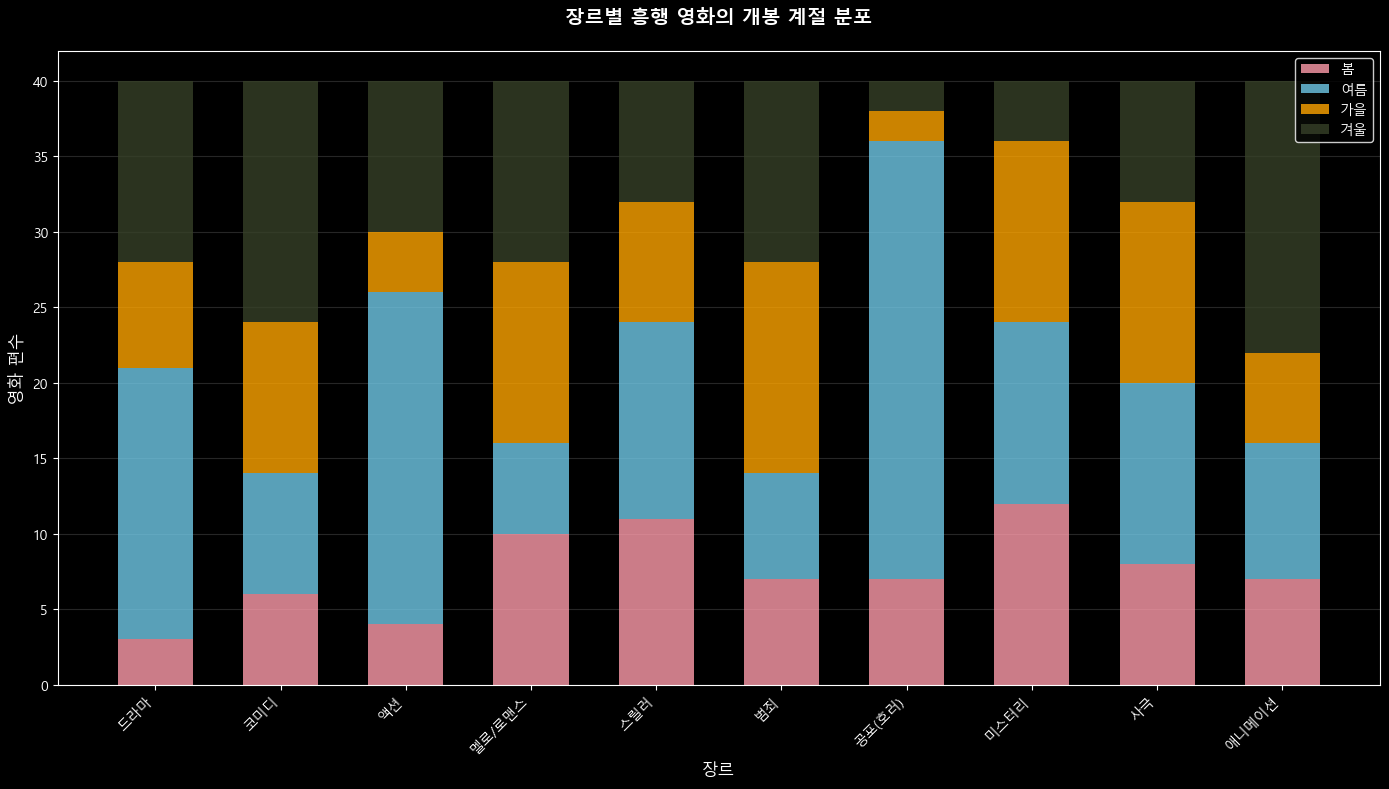

장르별 계절 분포 통계 (각 장르별 수익 상위 40편 기준):


,장르,총 영화수,봄_편수,봄_비율,여름_편수,여름_비율,가을_편수,가을_비율,겨울_편수,겨울_비율
0,드라마,40,3,7.5%,18,45.0%,7,17.5%,12,30.0%
1,코미디,40,6,15.0%,8,20.0%,10,25.0%,16,40.0%
2,액션,40,4,10.0%,22,55.0%,4,10.0%,10,25.0%
3,멜로/로맨스,40,10,25.0%,6,15.0%,12,30.0%,12,30.0%
4,스릴러,40,11,27.5%,13,32.5%,8,20.0%,8,20.0%
5,범죄,40,7,17.5%,7,17.5%,14,35.0%,12,30.0%
6,공포(호러),40,7,17.5%,29,72.5%,2,5.0%,2,5.0%
7,미스터리,40,12,30.0%,12,30.0%,12,30.0%,4,10.0%
8,사극,40,8,20.0%,12,30.0%,12,30.0%,8,20.0%
9,애니메이션,40,7,17.5%,9,22.5%,6,15.0%,18,45.0%


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import ast

# 경고 메시지 무시 설정 및 폰트 설정
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 파일 경로
PATH_EXP = "./data/processed/kobis_genre_exploded.csv"

# 데이터 로드
df = pd.read_csv(PATH_EXP)

# 영화 편수가 10편 이상인 장르만 필터링 (기타 제외)
genre_counts = df['genres'].value_counts()
valid_genres = genre_counts[genre_counts >= 10].index
valid_genres = valid_genres[valid_genres != '기타']

# TOP 10 장르 선택 (영화 편수 기준)
top10_genres = valid_genres[:10]

# 각 장르별로 수익 상위 40편씩 선택
top_movies = []
for genre in top10_genres:
    genre_movies = df[df['genres'] == genre].nlargest(40, 'revenue')
    top_movies.append(genre_movies)

df_top = pd.concat(top_movies, ignore_index=True)

# 계절 분류 함수
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    elif month in [12, 1, 2]:
        return '겨울'
    else:
        return None

# 계절 컬럼 추가
df_top['season'] = df_top['release_month'].apply(get_season)

# 결측치 제거
df_top = df_top.dropna(subset=['season'])

# 장르별, 계절별 영화 수 계산
season_counts = df_top.groupby(['genres', 'season']).size().unstack(fill_value=0)

# TOP 10 장르만 유지
season_counts = season_counts.reindex(top10_genres).fillna(0)

# 그래프 생성
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 계절별 색상 변경
colors = {
    '봄': "#FF9CAB", 
    '여름': "#70C9E7", 
    '가을': '#FFA500',
    '겨울': "#374128"
}

# 스택 막대 그래프 생성
x = np.arange(len(season_counts.index))
width = 0.6

# 각 계절별로 누적하여 그리기
bottom = np.zeros(len(season_counts.index))

for season in ['봄', '여름', '가을', '겨울']:
    if season in season_counts.columns:
        bars = ax.bar(x, season_counts[season], width, 
                     label=season, color=colors[season], 
                     bottom=bottom, alpha=0.8)
        
        bottom += season_counts[season]

# 축 설정
ax.set_xlabel('장르', color='white', fontsize=12)
ax.set_ylabel('영화 편수', color='white', fontsize=12)
ax.set_title('장르별 흥행 영화의 개봉 계절 분포', color='white', fontsize=14, fontweight='bold', pad=20)

# x축 레이블
ax.set_xticks(x)
ax.set_xticklabels(season_counts.index, rotation=45, ha='right', color='white')

# y축 색상
ax.tick_params(axis='y', colors='white')

# 범례 설정
ax.legend(loc='upper right', frameon=True, facecolor='black', 
          edgecolor='white', labelcolor='white')

# 그리드 설정
ax.grid(True, alpha=0.3, color='gray', axis='y')
ax.set_axisbelow(True)

# 축 테두리 색상
for spine in ax.spines.values():
    spine.set_color('white')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# DataFrame으로 통계 정보 출력
stats_data = []
for genre in season_counts.index:
    total = season_counts.loc[genre].sum()
    row = {'장르': genre, '총 영화수': int(total)}
    
    for season in ['봄', '여름', '가을', '겨울']:
        if season in season_counts.columns:
            count = season_counts.loc[genre, season]
            percentage = count / total * 100 if total > 0 else 0
            row[f'{season}_편수'] = int(count)
            row[f'{season}_비율'] = f"{percentage:.1f}%"
    
    stats_data.append(row)

stats_df = pd.DataFrame(stats_data)
print("장르별 계절 분포 통계 (각 장르별 수익 상위 40편 기준):")
display(stats_df)